In [ ]:
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#giải nén file data trong drive
! unzip gdrive/MyDrive/ai.zip

Archive:  gdrive/MyDrive/ai.zip
   creating: ai/
   creating: ai/Apple Braeburn/
  inflating: ai/Apple Braeburn/321_100.jpg  
  inflating: ai/Apple Braeburn/322_100.jpg  
  inflating: ai/Apple Braeburn/323_100.jpg  
  inflating: ai/Apple Braeburn/324_100.jpg  
  inflating: ai/Apple Braeburn/325_100.jpg  
  inflating: ai/Apple Braeburn/326_100.jpg  
  inflating: ai/Apple Braeburn/327_100.jpg  
  inflating: ai/Apple Braeburn/32_100.jpg  
  inflating: ai/Apple Braeburn/33_100.jpg  
  inflating: ai/Apple Braeburn/34_100.jpg  
  inflating: ai/Apple Braeburn/35_100.jpg  
  inflating: ai/Apple Braeburn/36_100.jpg  
  inflating: ai/Apple Braeburn/37_100.jpg  
  inflating: ai/Apple Braeburn/38_100.jpg  
  inflating: ai/Apple Braeburn/39_100.jpg  
  inflating: ai/Apple Braeburn/3_100.jpg  
  inflating: ai/Apple Braeburn/40_100.jpg  
  inflating: ai/Apple Braeburn/41_100.jpg  
  inflating: ai/Apple Braeburn/42_100.jpg  
  inflating: ai/Apple Braeburn/43_100.jpg  
  inflating: ai/Apple Braeburn/44

In [ ]:
from pathlib import Path
train=Path('ai/')



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras import layers



In [ ]:
# chia data cho phần training
train_ds=tf.keras.utils.image_dataset_from_directory(train,
                                                     batch_size=10, #chia thành 10 gói data nhỏ để đưa vào model
                                                     image_size=(100,100),#ảnh đầu vào với kích thước 100*100
                                                     validation_split=0.2,#lấy 20%cho validation
                                                     seed=341,
                                                     subset='training'
                                                     )


Found 1630 files belonging to 10 classes.
Using 1304 files for training.


In [ ]:
# chia data cho validation 
val_ds=tf.keras.utils.image_dataset_from_directory(train,
                                                   batch_size=10,
                                                   image_size=(100,100),
                                                   validation_split=0.2,
                                                   seed=341,
                                                   subset='validation'
                                                   )
                                                     

Found 1630 files belonging to 10 classes.
Using 326 files for validation.


In [ ]:
# tạo model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(100,100,3)))
model.add(layers.Conv2D(8,3, strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=3))
model.add(layers.Dropout(0.35))
model.add(layers.Conv2D(16,3,strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Dropout(0.35))
model.add(layers.Conv2D(32,3,strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Softmax())
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 33, 33, 8)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 33, 33, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 33, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 16)       

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 10.2868 - accuracy: 0.3773 - val_loss: 0.9854 - val_accuracy: 0.7638
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.6590 - accuracy: 0.7791 - val_loss: 0.2679 - val_accuracy: 0.9816
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2827 - accuracy: 0.9057 - val_loss: 0.1457 - val_accuracy: 0.9939
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1681 - accuracy: 0.9425 - val_loss: 0.0730 - val_accuracy: 0.9908
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0837 - accuracy: 0.9724 - val_loss: 0.0881 - val_accuracy: 0.9816
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1267 - accuracy: 0.9647 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoc

In [ ]:
model.evaluate(val_ds)

33/33 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 1.0000


[0.02565973438322544, 1.0]

In [ ]:
#tạo label để demo
label={0:'Apple Braeburn',1:'Apricot',2:'Banana',3:'Cherry',4:'Guava',5:'Kiwi',6:'lychee',7:'Orange',8:'Peach',9:'Tomato'}

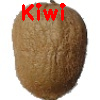

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
frame = cv.imread('9.jpg', cv.IMREAD_COLOR)
roi = cv.resize(frame,(100,100))
roi=  np.expand_dims(roi, 0) 
result = model.predict(roi)
score = tf.nn.softmax(result[0])
text=format(label[np.argmax(score)])
cv.putText(frame, text,(20,20),cv.FONT_HERSHEY_PLAIN  ,1.5,(0,0,255),2) 
cv2_imshow(frame) 

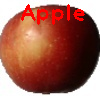

In [ ]:

frame = cv.imread('0.jpg', cv.IMREAD_COLOR)
roi = cv.resize(frame,(100,100))#resize ảnh
roi=  np.expand_dims(roi, 0) #đưa ảnh về (1,128,128,3)
result = model.predict(roi)
score = tf.nn.softmax(result[0])
text=format(label[np.argmax(score)])
cv.putText(frame, text,(20,20),cv.FONT_HERSHEY_PLAIN  ,1.5,(0,0,255),2) 
cv2_imshow(frame) 

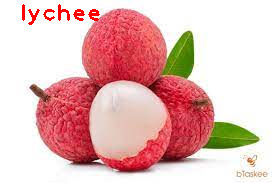

In [ ]:

frame = cv.imread('3.jfif', cv.IMREAD_COLOR)
roi = cv.resize(frame,(100,100))#resize ảnh
roi=  np.expand_dims(roi, 0) #đưa ảnh về (1,128,128,3)
result = model.predict(roi)
score = tf.nn.softmax(result[0])
text=format(label[np.argmax(score)])
cv.putText(frame, text,(20,20),cv.FONT_HERSHEY_PLAIN  ,1.5,(0,0,255),2) 
cv2_imshow(frame) 